In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


# С чем мы будем работать?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [23]:
path = "/content/gdrive/MyDrive/ML/Datasets/GSE52581_test2_raw_matrix.csv"
dataset = pd.read_csv(path)

In [24]:
dataset.shape

(1516, 10372)

In [25]:
dataset.head()

,Class,AADTGGFDLIWNEVKGHGSC,AAEMTIPFILDKQFKPWGSC,AAEVTIFQRLFMQARTRGSC,AAEWTFFADWDTEIPTGGSC,AAEWWKAWVLEAKIARPGSC,AAFADAFEHAGQIETSVGSC,AAGERDVFTQREKHTFLGSC,AAGMWEFWAYHFAPVDFGSC,AAGNYMDGWRRMAPTRSGSC,AAGQNTANKEDMRGNEWGSC,AAHFIALEYMLSGQFIAGSC,AAHINDVQSYLSRQHDSGSC,AAIETIQVAFLVLAMQDGSC,AAIPPSPEQFMAQHANAGSC,AAKFRTQWMHWMIWHHTGSC,AAKREKNAFFMMHWQNEGSC,AALDTGELKTAKTTVLLGSC,AALLATEAGSLAVDLAVGSC,AALQSGPEGIRFYLQSRGSC,AALVWGRWINHLDQASWGSC,AALWKVVAYMHSYGDTVGSC,AALYFDYVCIYTVARSHGSC,AAPDITGEDDLQKDVQLGSC,AAQSMALAIHLFYYIGKGSC,AAQTRTSITRSLDMQFQGSC,AATMWIMFVKSSTLWMKGSC,AAVAKRIAEQHMWMQVGGSC,AAVIGLLVMGIFAAIGIGSC,AAVPKYINAMWKGYAPDGSC,AAWTAVIPKSAWNYTIGGSC,AAYWHSREVENREFNWSGSC,ADDHEQWTEKMYKNQNMGSC,ADDSVPVGSRVTYAPIWGSC,ADEIFRKLNWMLSSDWSGSC,ADEIIEPTPAYPNAIEMGSC,ADFMSEMVLIFAKNDIGGSC,ADFMYGWMQGPIQVNGGGSC,ADFQRDIWWVPMWNAQAGSC,ADGDDATGIQSLDFTTFGSC,...,YWPDFFDIIVMQYRLINGSC,YWPGVDSGRMVGQLINHGSC,YWRNEMHPEDAEPMYKYGSC,YWSLVYNPTVKHRSFQDGSC,YWSTYNRNELYRKIMNKGSC,YWTHTPFDWLTLIYGQRGSC,YWTITLAQFPKLFEDRWGSC,YWVDSWPHFADNLTTRLGSC,YWWKQWFGVRTPLASETGSC,YWWQISRHRHSLSKHTEGSC,YWWWHLKPMYYKPSAITGSC,YYAEILAAFKLFIGNWGGSC,YYAHLEYTQFGPWNHLSGSC,YYAPHVTPWVNNKRWYSGSC,YYDGAMSSPEIRGKEIGGSC,YYETNHPNNSWAYWARVGSC,YYIADLDDSSNHLRHTKGSC,YYIQTPPPQKRSSEAHKGSC,YYKKFPAKVPWRPYFKQGSC,YYLWYIIEFFTHSTLSTGSC,YYMDRIKIAVFYYPMFRGSC,YYMHQNPPPNWAGAIMPGSC,YYNPFAQELDRTGPSNDGSC,YYNQQTFQHKFWYLLYGGSC,YYNRILEKMAPETKATAGSC,YYNVQQVDRWVKLQWGLGSC,YYPFWWIQLYKHDYQWKGSC,YYPQEAATIIWGVATVAGSC,YYQQFNVGAEIPMWKWPGSC,YYRHFIAGQYRSPAKTGGSC,YYRIVEYIGWFDPQIDYGSC,YYRTYYETYPREKDTYDGSC,YYSAKGEVLNMFKSMFAGSC,YYSARVKRTNYVIFWEYGSC,YYSVNPHEFRMMHISHLGSC,YYTMEYVKAYTQDIDTTGSC,YYVGRMEKWRATRMPDAGSC,YYVMVDNWDNPKQRYNKGSC,YYVSNQQTANDFVLVFNGSC,YYVYLMSGEYTEGETNSGSC
0,recurrent Breast cancer,2878.7390,3031.8073,2429.2762,1046.0672,1439.6712,1850.374900,2339.5463,2232.5987,1946.8026,1100.8200,1005.1316,1072.9774,1650.4123,917.2015,2264.3518,666.5620,3009.5022,2544.0911,1894.2460,2173.03030,2239.2292,1583.1865,384.8065,729.3692,3187.3674,1111.8988,990.6717,2867.3788,1156.2728,1884.8408,2148.2293,531.1230,3009.9586,1605.2149,1360.3957,1399.9565,839.1822,2158.5934,2369.0523,...,1814.8235,2088.3037,585.1419,2965.0284,2327.6882,1136.2651,2697.5393,1210.7556,2257.5964,624.4568,619.2793,2348.6659,1468.4042,806.3497,1610.2363,2409.6884,3158.6210,2871.0449,2064.8788,2184.3776,1435.9397,1695.9761,2124.7023,887.9933,1523.8143,1453.9060,2548.0240,1685.6113,780.1052,2900.2743,2068.0544,1753.1826,433.7805,2498.1306,2777.6092,2812.0823,2494.7229,1521.7302,1655.4635,2187.7425
1,recurrent Breast cancer,1160.5260,1619.4220,1443.8880,779.9266,772.1394,0.501439,2225.3170,727.1472,945.7721,958.5784,654.5554,694.6764,771.2765,947.7392,555.4870,1643.5620,1554.9300,1126.1720,1337.3900,0.03765,1158.3130,952.4775,300.4826,507.7507,1499.9420,1256.9350,994.0147,867.1762,964.9009,1191.4110,1170.4640,656.8054,1355.5760,890.2423,759.8402,831.0739,542.0828,1283.9560,1280.4550,...,1127.3400,1093.4530,763.3398,1380.9520,1350.4600,578.2155,1502.6260,998.7729,849.0031,1187.8270,906.4625,818.8194,797.5679,1013.3090,735.6934,1297.5550,1458.3290,1704.5340,1231.0810,707.0878,1024.5790,2748.3390,833.2818,640.3089,648.8708,1047.5120,1492.6490,579.9596,523.8020,1418.7990,1381.7990,851.8456,1021.4280,1357.7570,1888.4630,1447.8160,1252.4490,1231.2740,1060.3230,1287.9760
2,recurrent Breast cancer,2005.6267,3612.0609,2711.6900,1489.5443,842.7994,835.582800,1452.0392,639.6533,4155.6882,2068.0840,2407.4688,1429.8892,1462.7617,611.1103,1813.4749,789.7359,2833.9358,3202.2451,5603.2719,1904.32020,5523.3792,3282.2741,547.4726,696.6837,4047.7148,17145.1467,1061.1747,2694.7388,3898.1216,3689.1513,2742.8267,537.5432,3712.6800,2691.7361,408.8747,1629.9484,1722.7072,4639.8597,3153.9331,...,3019.4206,3430.4165,1382.8359,3996.3188,2819.1221,1020.3486,6516.7711,1721.6528,3079.3074,1677.2429,2714.4963,889.6889,788.2924,2300.0975,1159.1560,2512.2042,2990.8697,6545.8726,5316.4900,3197.3609,4994.7836,3637.0764,1896.8064,1429.7384,1309.2695,3408.6688,1026.6054,1257.7156,689.7777,3475.1048,2891.2428,2387.5634,1479.205

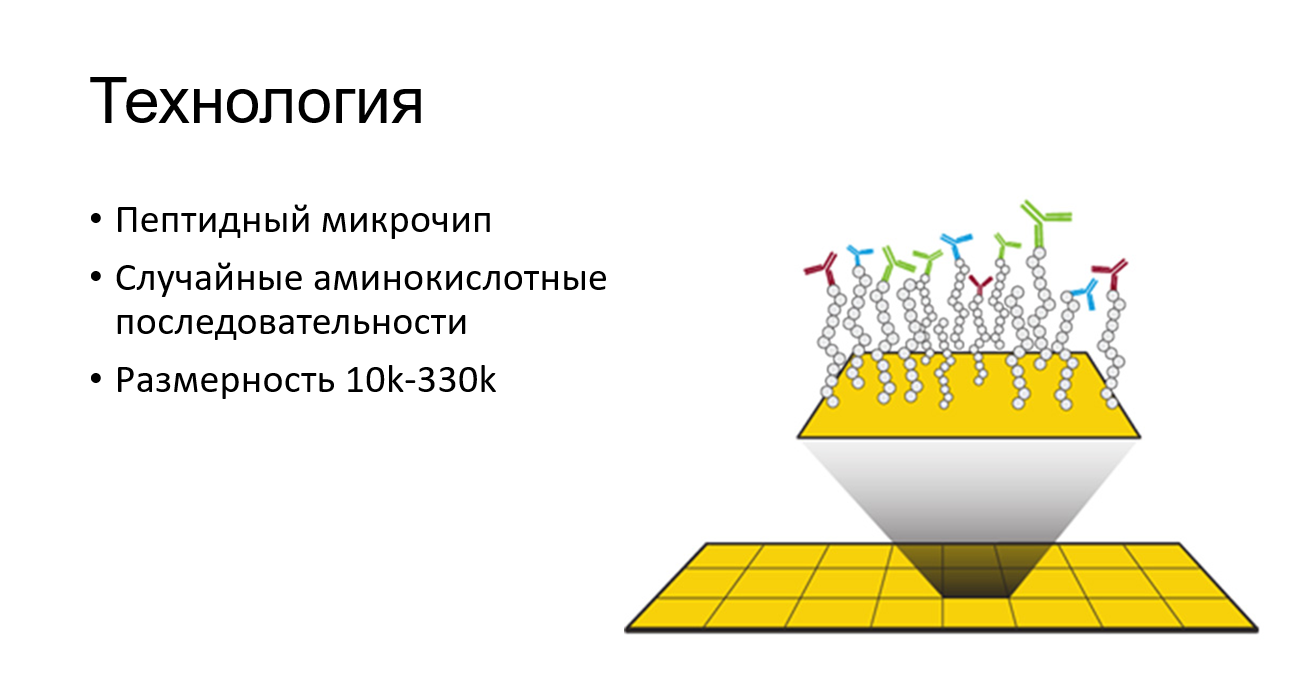

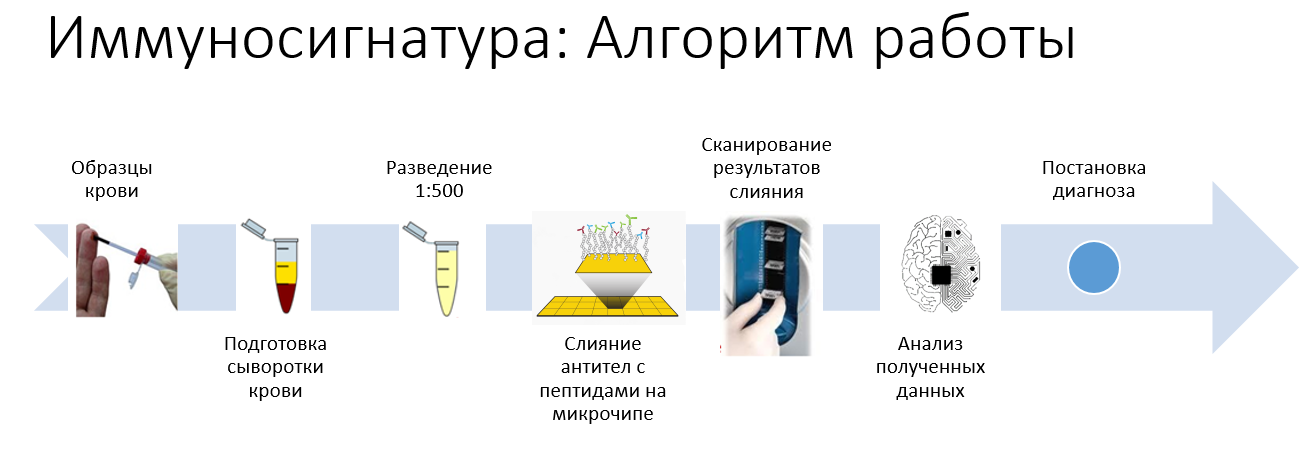

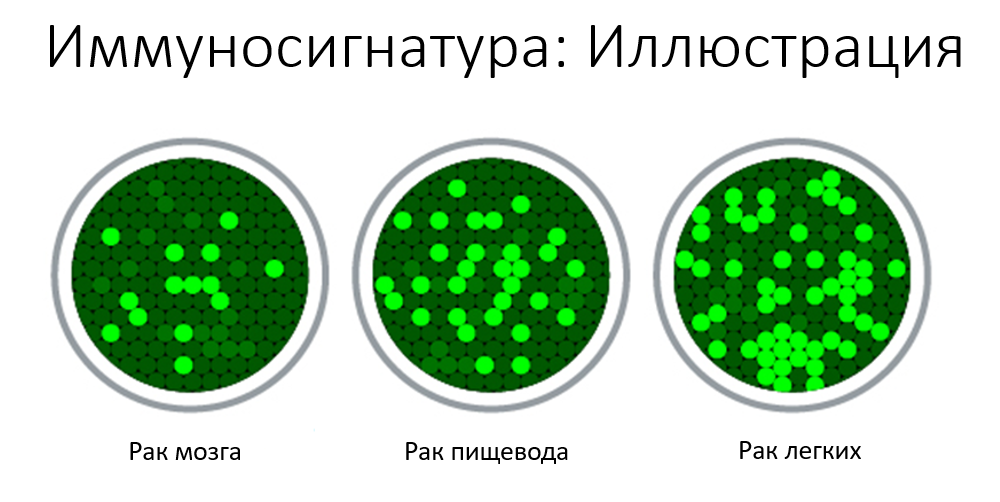

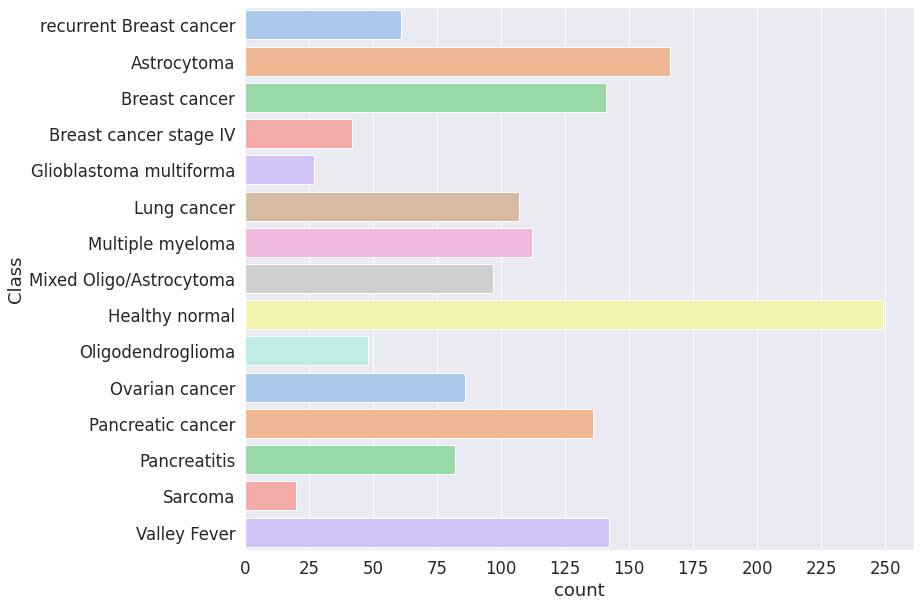

In [29]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(12, 10))
ax.set_xticks(range(0, 251, 25))
sns.countplot(y="Class", data=dataset, palette = "pastel")

In [30]:
dataset.isnull().sum().sum()

0

In [31]:
X = dataset.drop(["Class"], axis = 1)     # Резделим признаки и целевую переменную, это необходимо для удобства использования методов анализа данных.
y = dataset.Class

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y)
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [33]:
X_train.shape

(1212, 10371)

# Картинки наше всё

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [35]:
col_name = X_train.columns

In [36]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns = col_name)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = col_name)

In [37]:
%%time
X_tsne = TSNE(n_components = 2).fit_transform(X_train)

CPU times: user 50.1 s, sys: 63.8 ms, total: 50.2 s
Wall time: 41.5 s


In [38]:
X_tsne = pd.DataFrame(X_tsne)
X_tsne.rename(columns = {0:'1-я компонента', 1:'2-я компонента'}, inplace = True)
X_tsne["Class"] = y_train
X_tsne.head()

,1-я компонента,2-я компонента,Class
0,6.893051,32.921837,Healthy normal
1,-5.948553,3.990155,Pancreatic cancer
2,2.845283,29.779428,Healthy normal
3,-3.533551,-14.522266,Mixed Oligo/Astrocytoma
4,-19.451225,-20.069839,Healthy normal


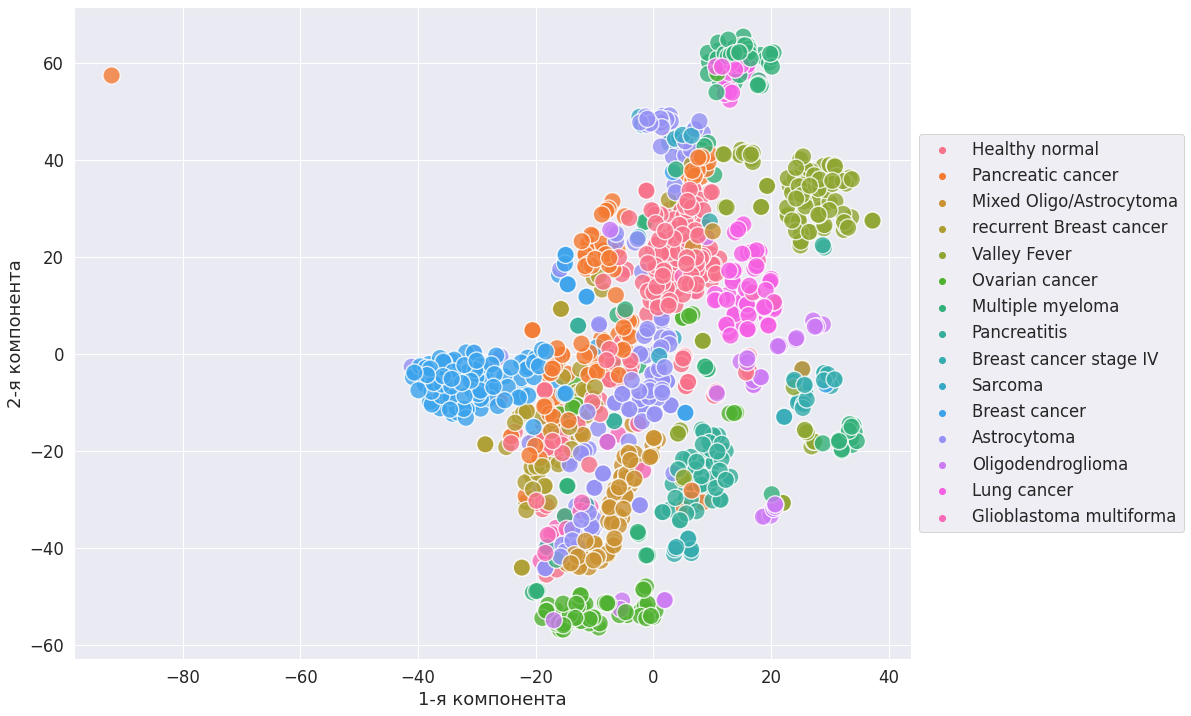

In [39]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 12))
g = sns.scatterplot(x = "1-я компонента", y = "2-я компонента", hue = "Class", data = X_tsne, s = 300, alpha = 0.8)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

# Метод опорных векторов

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
model_SVC = SVC(kernel = 'linear')

In [47]:
model_SVC.fit(X_train, y_train)
pred_svm = model_SVC.predict(X_test)

In [50]:
print(classification_report(y_test, pred_svm))

                         precision    recall  f1-score   support

            Astrocytoma       0.93      0.82      0.87        33
          Breast cancer       0.90      1.00      0.95        28
 Breast cancer stage IV       0.60      0.75      0.67         8
Glioblastoma multiforma       0.67      0.80      0.73         5
         Healthy normal       0.82      0.90      0.86        50
            Lung cancer       0.83      0.86      0.84        22
Mixed Oligo/Astrocytoma       0.81      0.85      0.83        20
       Multiple myeloma       1.00      0.61      0.76        23
      Oligodendroglioma       0.75      0.90      0.82        10
         Ovarian cancer       0.75      0.71      0.73        17
      Pancreatic cancer       0.86      0.93      0.89        27
           Pancreatitis       0.94      1.00      0.97        16
                Sarcoma       0.75      0.75      0.75         4
           Valley Fever       1.00      0.90      0.95        29
recurrent Breast cancer 

In [55]:
confusion_matrix(y_test, pred_svm)

array([[27,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  1,  0,  3],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  6,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 45,  0,  0,  0,  2,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  1, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  1,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  2,  4,  1, 14,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0, 12,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 25,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  2,  0,  0

In [57]:
pd.DataFrame(confusion_matrix(y_test, pred_svm), columns = model_SVC.classes_, index = model_SVC.classes_)

,Astrocytoma,Breast cancer,Breast cancer stage IV,Glioblastoma multiforma,Healthy normal,Lung cancer,Mixed Oligo/Astrocytoma,Multiple myeloma,Oligodendroglioma,Ovarian cancer,Pancreatic cancer,Pancreatitis,Sarcoma,Valley Fever,recurrent Breast cancer
Astrocytoma,27,0,0,0,0,0,1,0,0,1,0,0,1,0,3
Breast cancer,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0
Breast cancer stage IV,0,1,6,0,0,0,1,0,0,0,0,0,0,0,0
Glioblastoma multiforma,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0
Healthy normal,0,2,0,0,45,0,0,0,2,1,0,0,0,0,0
Lung cancer,0,0,0,2,1,19,0,0,0,0,0,0,0,0,0
Mixed Oligo/Astrocytoma,1,0,1,0,1,0,17,0,0,0,0,0,0,0,0
Multiple myeloma,0,0,2,0,2,4,1,14,0,0,0,0,0,0,0
Oligodendroglioma,0,0,0,0,1,0,0,0,9,0,0,0,0,0,0
Ovarian cancer,0,0,0,0,3,0,0,0,0,12,2,0,0,0,0


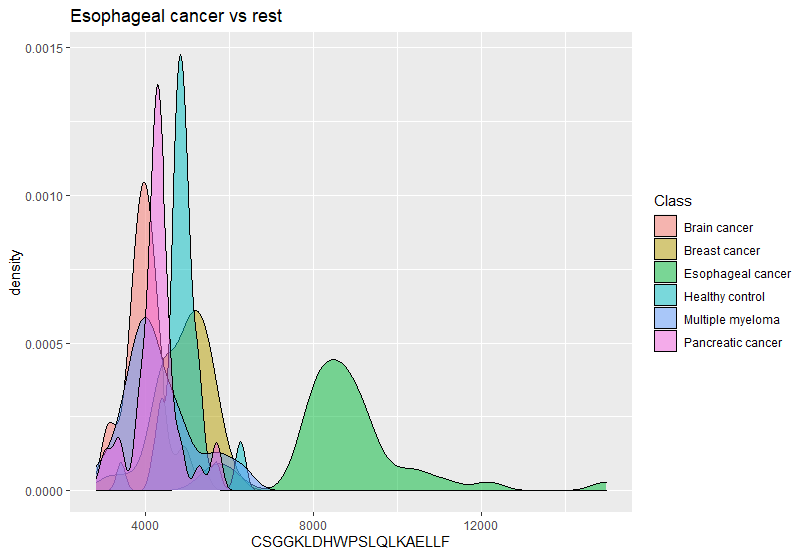

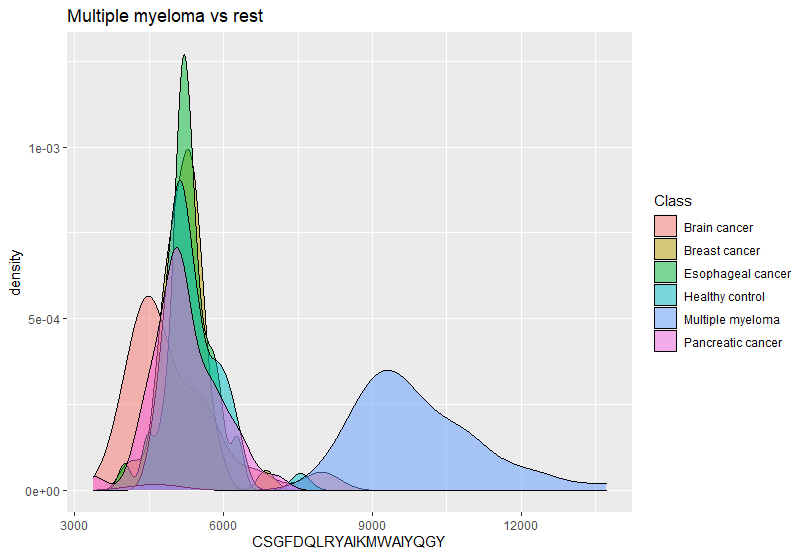

In [60]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif

In [62]:
list_des = y_train[y_train != "Healthy normal"].value_counts().index
select_k_best_classifier = SelectKBest(mutual_info_classif, k = 10)

In [63]:
%%time
res = []
for one in list_des:
    label = [one if i == one else "rest" for i in y_train]
    X_train['label'] = label
    median = X_train.loc[X_train['label'] == one].describe().iloc[5] - X_train.loc[X_train['label'] == 'rest'].describe().iloc[5]
    buff_data = X_train[median[median > 0].index]
    select_k_best_classifier.fit(buff_data, label)
    res.append(buff_data.columns[select_k_best_classifier.get_support()])

CPU times: user 22min 34s, sys: 3.21 s, total: 22min 37s
Wall time: 22min 38s


In [65]:
inf_feature = pd.DataFrame(res).T
inf_feature.columns = [one + " vs rest" for one in list_des]

In [66]:
inf_feature

,Astrocytoma vs rest,Breast cancer vs rest,Valley Fever vs rest,Pancreatic cancer vs rest,Multiple myeloma vs rest,Lung cancer vs rest,Mixed Oligo/Astrocytoma vs rest,Ovarian cancer vs rest,Pancreatitis vs rest,recurrent Breast cancer vs rest,Oligodendroglioma vs rest,Breast cancer stage IV vs rest,Glioblastoma multiforma vs rest,Sarcoma vs rest
0,AHKVVPQRQIRHAYNRYGSC,ANEKKIMGKTTMRRSHLGSC,FLKWWGHIRAPTDHSRWGSC,DGGMSMTFQIHDMEQYAGSC,FNFKFLYDSQYPNLPHNGSC,GLEDQNRFDWMYEFDDQGSC,DENDSNHYKQYQHHQDNGSC,AQRQGDYYHSKPEHDDNGSC,AALWKVVAYMHSYGDTVGSC,ATHVAKNIWWKKNAYKVGSC,HFGAWRFFGTAWYARNPGSC,EIWPDWQKYLFRPWLTHGSC,GPLLMRVDTFTFFMELSGSC,EMWPYNGQAQLHSSMMMGSC
1,EMWPYNGQAQLHSSMMMGSC,ISIHHPKIKKNFPSPKMGSC,GTNERYNMRKYHWWYWYGSC,EGEDTEGKKSKEEGEITGSC,GNKPVWLRREIVLDIPGGSC,HRIWKHEYEQKLDHMWGGSC,GEASDNYKWWWDHVVYPGSC,FPEILSTTIDRVVVNRGGSC,KHWPHHKWWRWWRFWHFGSC,DENDNDDENDDENENDDGSC,HFQKYAGFRYGMYVQHFGSC,HHSFWYQTRPLSYYAFKGSC,NDIAMRYHLGYFRMSQLGSC,FVQPGQGGQGMGRISYRGSC
2,HYNRYMVIIGNWGKQPIGSC,ISNSTLKKRRPYLAPSSGSC,HFWHWWKHHRWKPWFWHGSC,GEQLTEYIRIKIVVLFMGSC,IHSFRERGKWFVFTLVPGSC,IKTFVVDFHALNTMMFQGSC,IENHSRPWWGHKFRDVEGSC,GLSLMYRLLNASRDDLMGSC,MFIFVEQPNADMPQDWWGSC,IRSLTAEDIMWQDNRQIGSC,LHWIPHYKNGIWNSSWRGSC,IKLKLYYGVHDNDFSWLGSC,NMMIEYNYFIQKGIRVPGSC,GQDHWAIKYIMMAVDHIGSC
3,IPKPLKRERHYNIAPRSGSC,KKRLQTRQPINKHAQRHGSC,KLKPMKKFQIQVNVLPYGSC,GQDHWAIKYIMMAVDHIGSC,IVLHNIDFSWQKSVIFHGSC,PDSSGTYHNRGTQTNGWGSC,NHWEGHDPAWSIYDLEYGSC,KENSHNRTENEYKTTEDGSC,PEDMNKYGGPFGAKIMFGSC,KPTTVKSEVGRADQDDHGSC,LVGWYNLNFGHKHNAAPGSC,KFPNEFRYRYNWRMQNPGSC,NTDTIEATWAWMARWQTGSC,HYNRYMVIIGNWGKQPIGSC
4,KCKYMCIYMKLRRNCCIGSC,KQKLPHWYRRLDRPVTVGSC,KMNGQGMKYWHWSRAQYGSC,IHVYNNLVEFAYSWATLGSC,KSVSPFLSRSDNQHGYIGSC,QDFMKWQDNRHEFGWTQGSC,NLQPFIFLINLLRMQFIGSC,MIFDPQKYVPIRPNLQQGSC,PEEKAQYEDFANQPFVIGSC,LSGPIKVQPTHRPPSSIGSC,MPLHWMDKGFLIIPWVWGSC,MFRQHDWANAPPGFWYYGSC,QDLLDYHLSDFVLFAHMGSC,KHWHWHKRKKHHRKFFWGSC
5,KKFHPHFKPWHFRHKKPGSC,KVRAKFPAKDRPFTGSRGSC,LIERGWVHQWTRFVKFPGSC,KMHPVIQMQAYYNRFFYGSC,MKPLISYGPAWFGPLLWGSC,QEEPWAWEFATHDSPHEGSC,RWRIIHGEWMLLKKWGHGSC,MWWINITGELMWAMMHMGSC,PIDRHDWKHHIGSAVSLGSC,MVNGLAMRMHNKVMPNIGSC,QWLKGRAFHPVMSWHVEGSC,PVVAMPVFQHSSTDIRRGSC,QIIGMKNWRVTFRYGTHGSC,NINIIWKIEVMRFWDMKGSC
6,LRKISRGIWGMREAGEFGSC,PKQHGRQQNQGIFKPMLGSC,NPAHASGPGRAWTYHWWGSC,MDLFGIHLQAFQLDWKVGSC,QWHQKYWTADIVKFTVTGSC,TAKWYGIRNSQDEKVEAGSC,VNFESFREPTFGSDGYSGSC,QWRDVAETLELIMTKENGSC,PLPPADAPPYPFVHVNGGSC,QGNMNLWKYKKMADMGRGSC,RWAPRAMIYTWHPFQWPGSC,WFLKGIPIFTGMDYGFHGSC,QRNRHTSDDHKYNRDHTGSC,RWRIIHGEWMLLKKWGHGSC
7,RWRIIHGEWMLLKKWGHGSC,QRSVAKFQKHRFNTIRKGSC,TSDLQRRGKSGALLIHMGSC,NMTWKETNYFRVGIWYYGSC,STVWVVFPQQKVQPLLTGSC,TARYDWQRYIFTQVVTIGSC,VPSDLGFPTGMQVNVYPGSC,VAHYFHPAVNISSEPTNGSC,PMEHTDVTSKPMNFDVMGSC,RQVDVLSPESIMAKGNFGSC,RYQAQIRFYHAWKYFGAGSC,WMKRFVGRFWRDWPAFWGSC,RNVDWTPIRTQNFTILRGSC,SIADIHKRKFRVRRKHIGSC
8,SIADIHKRKFRVRRKHIGSC,RSRINPIFNHRHLKRPRGSC,YGQDNVRYYKKPAHKSHGSC,NNSMPGFKGVHKGHKSGGSC,TRLFTAYYSPMQGGLGMGSC,VSQFYDDMWQDQVEKETGSC,WISWDYDLKHEGTQDWFGSC,VWGEMENPAGGMQDFKMGSC,PWDHNNGQKVEPEDKTNGSC,SIKDVRSISAERSLSAEGSC,WMKRFVGRFWRDWPAFWGSC,WWQHFEGRRLKQNYPVFGSC,WEIDNSKRYYKVTFYIEGSC,VPSDLGFPTGMQVNVYPGSC
9,VPSDLGFPTGMQVNVYPGSC,TYQRRMGGVRGQQPYNKGSC,YTWNARDLFPWAKLEMKGSC,VNWIFGIKFIHRKYRKHGSC,VPVIKIGPQWEKMWVWNGSC,YRRNTTFYDMWDESMYHGSC,WRFYNFWTAYGNQFNESGSC,YDFLFKSKQEFEPLLAGGSC,YANKVQVTRSVPWYWFLGSC,SMKNNWGAIPVLKDGTVGSC,WMYRAALPKWSVVYELRGSC,WYDARNMMFDPWHTWGLGSC,YWTHTPFDWLTLIYGQRGSC,YARPYSMLKKHQRSIKTGSC


In [78]:
best_feature = np.concatenate(inf_feature.iloc[0:11].values)

In [84]:
X_train_best = X_train[best_feature]
X_train_best.shape

(1212, 140)

In [85]:
X_test_best = X_test[best_feature]
X_test_best.shape

(304, 140)

In [86]:
model_SVC.fit(X_train_best, y_train)
pred_svm_best = model_SVC.predict(X_test_best)

In [87]:
print(classification_report(y_test, pred_svm_best))

                         precision    recall  f1-score   support

            Astrocytoma       0.79      0.82      0.81        33
          Breast cancer       0.87      0.96      0.92        28
 Breast cancer stage IV       0.89      1.00      0.94         8
Glioblastoma multiforma       1.00      1.00      1.00         5
         Healthy normal       0.80      0.88      0.84        50
            Lung cancer       1.00      0.77      0.87        22
Mixed Oligo/Astrocytoma       0.85      0.85      0.85        20
       Multiple myeloma       0.86      0.78      0.82        23
      Oligodendroglioma       0.73      0.80      0.76        10
         Ovarian cancer       0.71      0.71      0.71        17
      Pancreatic cancer       0.79      0.81      0.80        27
           Pancreatitis       0.94      0.94      0.94        16
                Sarcoma       1.00      0.25      0.40         4
           Valley Fever       0.93      0.93      0.93        29
recurrent Breast cancer 